# Fetch random image from the test set and find its best match from the train set

### Necessary imports

In [2]:
import pickle
import glob
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

from utils import load_dataset, get_img_features

### Load SIFT features dataset

In [3]:
SIFT_features = load_dataset('SIFT_features')

### Pick an image from the test set randomly

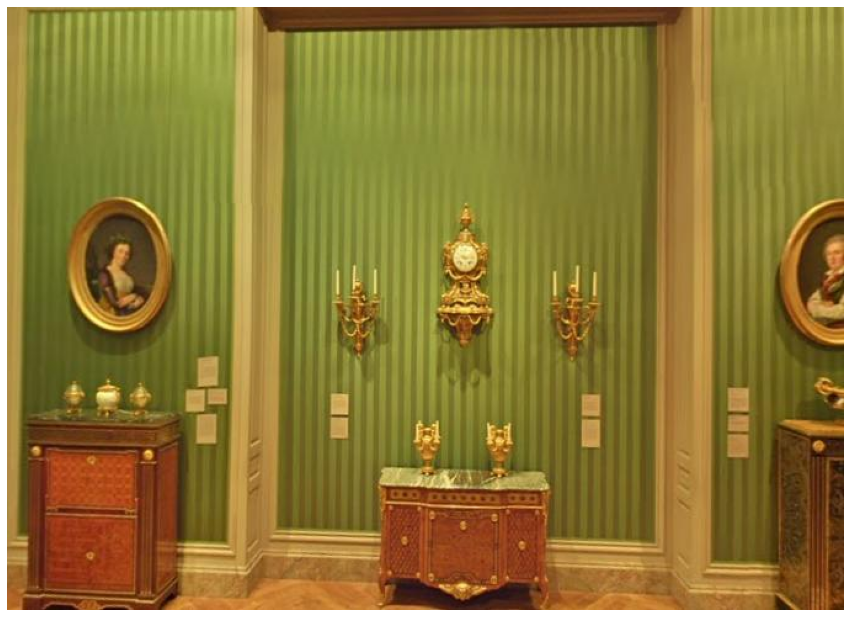

In [114]:
# Get list of all images
img_paths = glob.glob('./Dataset/test/*')

# Pick an image randomly
i = np.random.randint(0, len(img_paths))
img_path = img_paths[i]

# Load image
img = cv.cvtColor(cv.imread(img_path), cv.COLOR_RGB2BGR)

# Plot
plt.subplots(figsize = (15, 15))
plt.imshow(img)
plt.axis('off')
plt.show()

### Get SIFT features for this image

In [115]:
sift = cv.SIFT_create()
kp_test, des_test = sift.detectAndCompute(img, None)

### Look for best SIFT match in train images

In [116]:
# Dictionary for storing best match so far
best_match = {'name': '', 'matches': 0, 'keypoints': [],
              'descriptors': [], 'good_matches': [], 'matchesMask': []}

# Set up Flann based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)

# Go through each image in the dataset
for i, img_name in enumerate(SIFT_features):
    
    print(f'Working on image {i+1} of {len(SIFT_features)}')
    
    # Load its SIFT features
    kp, des = get_img_features(img_name, SIFT_features)
    
    # Check both images have descriptors
    if (des is not None) and (des_test is not None):
        if (len(des) > 2) and (len(des_test) > 2):
            
            # Match features
            matches = flann.knnMatch(des_test, des, k = 2)
            
            matchesMask = []
            good_matches = []
            
            for m, n in matches:
                if m.distance < 0.7*n.distance:
                    good_matches.append(m)
                    matchesMask.append([1,0])
                    
                else:
                    matchesMask.append([0,0])
            
            # Update best match so far if needed
            if len(good_matches) > best_match['matches']:
                best_match['name'] = img_name
                best_match['matches'] = len(good_matches)
                best_match['keypoints'] = kp
                best_match['descriptors'] = des
                best_match['good_matches'] = good_matches
                best_match['matchesMask'] = matchesMask
                
                print(f'New best match found! {len(good_matches)} matches')
                print()
    
    

Working on image 1 of 7500
New best match found! 18 matches

Working on image 2 of 7500
Working on image 3 of 7500
Working on image 4 of 7500
Working on image 5 of 7500
Working on image 6 of 7500
Working on image 7 of 7500
Working on image 8 of 7500
New best match found! 26 matches

Working on image 9 of 7500
Working on image 10 of 7500
New best match found! 44 matches

Working on image 11 of 7500
Working on image 12 of 7500
Working on image 13 of 7500
Working on image 14 of 7500
Working on image 15 of 7500
Working on image 16 of 7500
Working on image 17 of 7500
Working on image 18 of 7500
Working on image 19 of 7500
Working on image 20 of 7500
Working on image 21 of 7500
Working on image 22 of 7500
Working on image 23 of 7500
Working on image 24 of 7500
Working on image 25 of 7500
Working on image 26 of 7500
Working on image 27 of 7500
Working on image 28 of 7500
Working on image 29 of 7500
Working on image 30 of 7500
Working on image 31 of 7500
Working on image 32 of 7500
Working on 

Working on image 288 of 7500
Working on image 289 of 7500
Working on image 290 of 7500
Working on image 291 of 7500
Working on image 292 of 7500
Working on image 293 of 7500
Working on image 294 of 7500
Working on image 295 of 7500
Working on image 296 of 7500
Working on image 297 of 7500
Working on image 298 of 7500
Working on image 299 of 7500
Working on image 300 of 7500
Working on image 301 of 7500
Working on image 302 of 7500
Working on image 303 of 7500
Working on image 304 of 7500
Working on image 305 of 7500
Working on image 306 of 7500
Working on image 307 of 7500
Working on image 308 of 7500
Working on image 309 of 7500
Working on image 310 of 7500
Working on image 311 of 7500
Working on image 312 of 7500
Working on image 313 of 7500
Working on image 314 of 7500
Working on image 315 of 7500
Working on image 316 of 7500
Working on image 317 of 7500
Working on image 318 of 7500
Working on image 319 of 7500
Working on image 320 of 7500
Working on image 321 of 7500
Working on ima

Working on image 571 of 7500
Working on image 572 of 7500
Working on image 573 of 7500
Working on image 574 of 7500
Working on image 575 of 7500
Working on image 576 of 7500
Working on image 577 of 7500
Working on image 578 of 7500
Working on image 579 of 7500
Working on image 580 of 7500
Working on image 581 of 7500
Working on image 582 of 7500
Working on image 583 of 7500
Working on image 584 of 7500
Working on image 585 of 7500
Working on image 586 of 7500
Working on image 587 of 7500
Working on image 588 of 7500
Working on image 589 of 7500
Working on image 590 of 7500
Working on image 591 of 7500
Working on image 592 of 7500
Working on image 593 of 7500
Working on image 594 of 7500
Working on image 595 of 7500
Working on image 596 of 7500
Working on image 597 of 7500
Working on image 598 of 7500
Working on image 599 of 7500
Working on image 600 of 7500
Working on image 601 of 7500
Working on image 602 of 7500
Working on image 603 of 7500
Working on image 604 of 7500
Working on ima

Working on image 855 of 7500
Working on image 856 of 7500
Working on image 857 of 7500
Working on image 858 of 7500
Working on image 859 of 7500
Working on image 860 of 7500
Working on image 861 of 7500
Working on image 862 of 7500
Working on image 863 of 7500
Working on image 864 of 7500
Working on image 865 of 7500
Working on image 866 of 7500
Working on image 867 of 7500
Working on image 868 of 7500
Working on image 869 of 7500
Working on image 870 of 7500
Working on image 871 of 7500
Working on image 872 of 7500
Working on image 873 of 7500
Working on image 874 of 7500
Working on image 875 of 7500
Working on image 876 of 7500
Working on image 877 of 7500
Working on image 878 of 7500
Working on image 879 of 7500
Working on image 880 of 7500
Working on image 881 of 7500
Working on image 882 of 7500
Working on image 883 of 7500
Working on image 884 of 7500
Working on image 885 of 7500
Working on image 886 of 7500
Working on image 887 of 7500
Working on image 888 of 7500
Working on ima

Working on image 1133 of 7500
Working on image 1134 of 7500
Working on image 1135 of 7500
Working on image 1136 of 7500
Working on image 1137 of 7500
Working on image 1138 of 7500
Working on image 1139 of 7500
Working on image 1140 of 7500
Working on image 1141 of 7500
Working on image 1142 of 7500
Working on image 1143 of 7500
Working on image 1144 of 7500
Working on image 1145 of 7500
Working on image 1146 of 7500
Working on image 1147 of 7500
Working on image 1148 of 7500
Working on image 1149 of 7500
Working on image 1150 of 7500
Working on image 1151 of 7500
Working on image 1152 of 7500
Working on image 1153 of 7500
Working on image 1154 of 7500
Working on image 1155 of 7500
Working on image 1156 of 7500
Working on image 1157 of 7500
Working on image 1158 of 7500
Working on image 1159 of 7500
Working on image 1160 of 7500
Working on image 1161 of 7500
Working on image 1162 of 7500
Working on image 1163 of 7500
Working on image 1164 of 7500
Working on image 1165 of 7500
Working on

Working on image 1408 of 7500
Working on image 1409 of 7500
Working on image 1410 of 7500
Working on image 1411 of 7500
Working on image 1412 of 7500
Working on image 1413 of 7500
Working on image 1414 of 7500
Working on image 1415 of 7500
Working on image 1416 of 7500
Working on image 1417 of 7500
Working on image 1418 of 7500
Working on image 1419 of 7500
Working on image 1420 of 7500
Working on image 1421 of 7500
Working on image 1422 of 7500
Working on image 1423 of 7500
Working on image 1424 of 7500
Working on image 1425 of 7500
Working on image 1426 of 7500
Working on image 1427 of 7500
Working on image 1428 of 7500
Working on image 1429 of 7500
Working on image 1430 of 7500
Working on image 1431 of 7500
Working on image 1432 of 7500
Working on image 1433 of 7500
Working on image 1434 of 7500
Working on image 1435 of 7500
Working on image 1436 of 7500
Working on image 1437 of 7500
Working on image 1438 of 7500
Working on image 1439 of 7500
Working on image 1440 of 7500
Working on

Working on image 1681 of 7500
Working on image 1682 of 7500
Working on image 1683 of 7500
Working on image 1684 of 7500
Working on image 1685 of 7500
Working on image 1686 of 7500
Working on image 1687 of 7500
Working on image 1688 of 7500
Working on image 1689 of 7500
Working on image 1690 of 7500
Working on image 1691 of 7500
Working on image 1692 of 7500
Working on image 1693 of 7500
Working on image 1694 of 7500
Working on image 1695 of 7500
Working on image 1696 of 7500
Working on image 1697 of 7500
Working on image 1698 of 7500
Working on image 1699 of 7500
Working on image 1700 of 7500
Working on image 1701 of 7500
Working on image 1702 of 7500
Working on image 1703 of 7500
Working on image 1704 of 7500
Working on image 1705 of 7500
Working on image 1706 of 7500
Working on image 1707 of 7500
Working on image 1708 of 7500
Working on image 1709 of 7500
Working on image 1710 of 7500
Working on image 1711 of 7500
Working on image 1712 of 7500
Working on image 1713 of 7500
Working on

Working on image 1961 of 7500
Working on image 1962 of 7500
Working on image 1963 of 7500
Working on image 1964 of 7500
Working on image 1965 of 7500
Working on image 1966 of 7500
Working on image 1967 of 7500
Working on image 1968 of 7500
Working on image 1969 of 7500
Working on image 1970 of 7500
Working on image 1971 of 7500
Working on image 1972 of 7500
Working on image 1973 of 7500
Working on image 1974 of 7500
Working on image 1975 of 7500
Working on image 1976 of 7500
Working on image 1977 of 7500
Working on image 1978 of 7500
Working on image 1979 of 7500
Working on image 1980 of 7500
Working on image 1981 of 7500
Working on image 1982 of 7500
Working on image 1983 of 7500
Working on image 1984 of 7500
Working on image 1985 of 7500
Working on image 1986 of 7500
Working on image 1987 of 7500
Working on image 1988 of 7500
Working on image 1989 of 7500
Working on image 1990 of 7500
Working on image 1991 of 7500
Working on image 1992 of 7500
Working on image 1993 of 7500
Working on

Working on image 2241 of 7500
Working on image 2242 of 7500
Working on image 2243 of 7500
Working on image 2244 of 7500
Working on image 2245 of 7500
Working on image 2246 of 7500
Working on image 2247 of 7500
Working on image 2248 of 7500
Working on image 2249 of 7500
Working on image 2250 of 7500
Working on image 2251 of 7500
Working on image 2252 of 7500
Working on image 2253 of 7500
Working on image 2254 of 7500
Working on image 2255 of 7500
Working on image 2256 of 7500
Working on image 2257 of 7500
Working on image 2258 of 7500
Working on image 2259 of 7500
Working on image 2260 of 7500
Working on image 2261 of 7500
Working on image 2262 of 7500
Working on image 2263 of 7500
Working on image 2264 of 7500
Working on image 2265 of 7500
Working on image 2266 of 7500
Working on image 2267 of 7500
Working on image 2268 of 7500
Working on image 2269 of 7500
Working on image 2270 of 7500
Working on image 2271 of 7500
Working on image 2272 of 7500
Working on image 2273 of 7500
Working on

Working on image 2519 of 7500
Working on image 2520 of 7500
Working on image 2521 of 7500
Working on image 2522 of 7500
Working on image 2523 of 7500
Working on image 2524 of 7500
Working on image 2525 of 7500
Working on image 2526 of 7500
Working on image 2527 of 7500
Working on image 2528 of 7500
Working on image 2529 of 7500
Working on image 2530 of 7500
Working on image 2531 of 7500
Working on image 2532 of 7500
Working on image 2533 of 7500
Working on image 2534 of 7500
Working on image 2535 of 7500
Working on image 2536 of 7500
Working on image 2537 of 7500
Working on image 2538 of 7500
Working on image 2539 of 7500
Working on image 2540 of 7500
Working on image 2541 of 7500
Working on image 2542 of 7500
Working on image 2543 of 7500
Working on image 2544 of 7500
Working on image 2545 of 7500
Working on image 2546 of 7500
Working on image 2547 of 7500
Working on image 2548 of 7500
Working on image 2549 of 7500
Working on image 2550 of 7500
Working on image 2551 of 7500
Working on

Working on image 2795 of 7500
Working on image 2796 of 7500
Working on image 2797 of 7500
Working on image 2798 of 7500
Working on image 2799 of 7500
Working on image 2800 of 7500
Working on image 2801 of 7500
Working on image 2802 of 7500
Working on image 2803 of 7500
Working on image 2804 of 7500
Working on image 2805 of 7500
Working on image 2806 of 7500
Working on image 2807 of 7500
Working on image 2808 of 7500
Working on image 2809 of 7500
Working on image 2810 of 7500
Working on image 2811 of 7500
Working on image 2812 of 7500
Working on image 2813 of 7500
Working on image 2814 of 7500
Working on image 2815 of 7500
Working on image 2816 of 7500
Working on image 2817 of 7500
Working on image 2818 of 7500
Working on image 2819 of 7500
Working on image 2820 of 7500
Working on image 2821 of 7500
Working on image 2822 of 7500
Working on image 2823 of 7500
Working on image 2824 of 7500
Working on image 2825 of 7500
Working on image 2826 of 7500
Working on image 2827 of 7500
Working on

Working on image 3073 of 7500
Working on image 3074 of 7500
Working on image 3075 of 7500
Working on image 3076 of 7500
Working on image 3077 of 7500
Working on image 3078 of 7500
Working on image 3079 of 7500
Working on image 3080 of 7500
Working on image 3081 of 7500
Working on image 3082 of 7500
Working on image 3083 of 7500
Working on image 3084 of 7500
Working on image 3085 of 7500
Working on image 3086 of 7500
Working on image 3087 of 7500
Working on image 3088 of 7500
Working on image 3089 of 7500
Working on image 3090 of 7500
Working on image 3091 of 7500
Working on image 3092 of 7500
Working on image 3093 of 7500
Working on image 3094 of 7500
Working on image 3095 of 7500
Working on image 3096 of 7500
Working on image 3097 of 7500
Working on image 3098 of 7500
Working on image 3099 of 7500
Working on image 3100 of 7500
Working on image 3101 of 7500
Working on image 3102 of 7500
Working on image 3103 of 7500
Working on image 3104 of 7500
Working on image 3105 of 7500
Working on

Working on image 3350 of 7500
Working on image 3351 of 7500
Working on image 3352 of 7500
Working on image 3353 of 7500
Working on image 3354 of 7500
Working on image 3355 of 7500
Working on image 3356 of 7500
Working on image 3357 of 7500
Working on image 3358 of 7500
Working on image 3359 of 7500
Working on image 3360 of 7500
Working on image 3361 of 7500
Working on image 3362 of 7500
Working on image 3363 of 7500
Working on image 3364 of 7500
Working on image 3365 of 7500
Working on image 3366 of 7500
Working on image 3367 of 7500
Working on image 3368 of 7500
Working on image 3369 of 7500
Working on image 3370 of 7500
Working on image 3371 of 7500
Working on image 3372 of 7500
Working on image 3373 of 7500
Working on image 3374 of 7500
Working on image 3375 of 7500
Working on image 3376 of 7500
Working on image 3377 of 7500
Working on image 3378 of 7500
Working on image 3379 of 7500
Working on image 3380 of 7500
Working on image 3381 of 7500
Working on image 3382 of 7500
Working on

Working on image 3629 of 7500
Working on image 3630 of 7500
Working on image 3631 of 7500
Working on image 3632 of 7500
Working on image 3633 of 7500
Working on image 3634 of 7500
Working on image 3635 of 7500
Working on image 3636 of 7500
Working on image 3637 of 7500
Working on image 3638 of 7500
Working on image 3639 of 7500
Working on image 3640 of 7500
Working on image 3641 of 7500
Working on image 3642 of 7500
Working on image 3643 of 7500
Working on image 3644 of 7500
Working on image 3645 of 7500
Working on image 3646 of 7500
Working on image 3647 of 7500
Working on image 3648 of 7500
Working on image 3649 of 7500
Working on image 3650 of 7500
Working on image 3651 of 7500
Working on image 3652 of 7500
Working on image 3653 of 7500
Working on image 3654 of 7500
Working on image 3655 of 7500
Working on image 3656 of 7500
Working on image 3657 of 7500
Working on image 3658 of 7500
Working on image 3659 of 7500
Working on image 3660 of 7500
Working on image 3661 of 7500
Working on

Working on image 3903 of 7500
Working on image 3904 of 7500
Working on image 3905 of 7500
Working on image 3906 of 7500
Working on image 3907 of 7500
Working on image 3908 of 7500
Working on image 3909 of 7500
Working on image 3910 of 7500
Working on image 3911 of 7500
Working on image 3912 of 7500
Working on image 3913 of 7500
Working on image 3914 of 7500
Working on image 3915 of 7500
Working on image 3916 of 7500
Working on image 3917 of 7500
Working on image 3918 of 7500
Working on image 3919 of 7500
Working on image 3920 of 7500
Working on image 3921 of 7500
Working on image 3922 of 7500
Working on image 3923 of 7500
Working on image 3924 of 7500
Working on image 3925 of 7500
Working on image 3926 of 7500
Working on image 3927 of 7500
Working on image 3928 of 7500
Working on image 3929 of 7500
Working on image 3930 of 7500
Working on image 3931 of 7500
Working on image 3932 of 7500
Working on image 3933 of 7500
Working on image 3934 of 7500
Working on image 3935 of 7500
Working on

Working on image 4183 of 7500
Working on image 4184 of 7500
Working on image 4185 of 7500
Working on image 4186 of 7500
Working on image 4187 of 7500
Working on image 4188 of 7500
Working on image 4189 of 7500
Working on image 4190 of 7500
Working on image 4191 of 7500
Working on image 4192 of 7500
Working on image 4193 of 7500
Working on image 4194 of 7500
Working on image 4195 of 7500
Working on image 4196 of 7500
Working on image 4197 of 7500
Working on image 4198 of 7500
Working on image 4199 of 7500
Working on image 4200 of 7500
Working on image 4201 of 7500
Working on image 4202 of 7500
Working on image 4203 of 7500
Working on image 4204 of 7500
Working on image 4205 of 7500
Working on image 4206 of 7500
Working on image 4207 of 7500
Working on image 4208 of 7500
Working on image 4209 of 7500
Working on image 4210 of 7500
Working on image 4211 of 7500
Working on image 4212 of 7500
Working on image 4213 of 7500
Working on image 4214 of 7500
Working on image 4215 of 7500
Working on

Working on image 4462 of 7500
Working on image 4463 of 7500
Working on image 4464 of 7500
Working on image 4465 of 7500
Working on image 4466 of 7500
Working on image 4467 of 7500
Working on image 4468 of 7500
Working on image 4469 of 7500
Working on image 4470 of 7500
Working on image 4471 of 7500
Working on image 4472 of 7500
Working on image 4473 of 7500
Working on image 4474 of 7500
Working on image 4475 of 7500
Working on image 4476 of 7500
Working on image 4477 of 7500
Working on image 4478 of 7500
Working on image 4479 of 7500
Working on image 4480 of 7500
Working on image 4481 of 7500
Working on image 4482 of 7500
Working on image 4483 of 7500
Working on image 4484 of 7500
Working on image 4485 of 7500
Working on image 4486 of 7500
Working on image 4487 of 7500
Working on image 4488 of 7500
Working on image 4489 of 7500
Working on image 4490 of 7500
Working on image 4491 of 7500
Working on image 4492 of 7500
Working on image 4493 of 7500
Working on image 4494 of 7500
Working on

Working on image 4738 of 7500
Working on image 4739 of 7500
Working on image 4740 of 7500
Working on image 4741 of 7500
Working on image 4742 of 7500
Working on image 4743 of 7500
Working on image 4744 of 7500
Working on image 4745 of 7500
Working on image 4746 of 7500
Working on image 4747 of 7500
Working on image 4748 of 7500
Working on image 4749 of 7500
Working on image 4750 of 7500
Working on image 4751 of 7500
Working on image 4752 of 7500
Working on image 4753 of 7500
Working on image 4754 of 7500
Working on image 4755 of 7500
Working on image 4756 of 7500
Working on image 4757 of 7500
Working on image 4758 of 7500
Working on image 4759 of 7500
Working on image 4760 of 7500
Working on image 4761 of 7500
Working on image 4762 of 7500
Working on image 4763 of 7500
Working on image 4764 of 7500
Working on image 4765 of 7500
Working on image 4766 of 7500
Working on image 4767 of 7500
Working on image 4768 of 7500
Working on image 4769 of 7500
Working on image 4770 of 7500
Working on

Working on image 5012 of 7500
Working on image 5013 of 7500
Working on image 5014 of 7500
Working on image 5015 of 7500
Working on image 5016 of 7500
Working on image 5017 of 7500
Working on image 5018 of 7500
Working on image 5019 of 7500
Working on image 5020 of 7500
Working on image 5021 of 7500
Working on image 5022 of 7500
Working on image 5023 of 7500
Working on image 5024 of 7500
Working on image 5025 of 7500
Working on image 5026 of 7500
Working on image 5027 of 7500
Working on image 5028 of 7500
Working on image 5029 of 7500
Working on image 5030 of 7500
Working on image 5031 of 7500
Working on image 5032 of 7500
Working on image 5033 of 7500
Working on image 5034 of 7500
Working on image 5035 of 7500
Working on image 5036 of 7500
Working on image 5037 of 7500
Working on image 5038 of 7500
Working on image 5039 of 7500
Working on image 5040 of 7500
Working on image 5041 of 7500
Working on image 5042 of 7500
Working on image 5043 of 7500
Working on image 5044 of 7500
Working on

Working on image 5291 of 7500
Working on image 5292 of 7500
Working on image 5293 of 7500
Working on image 5294 of 7500
Working on image 5295 of 7500
Working on image 5296 of 7500
Working on image 5297 of 7500
Working on image 5298 of 7500
Working on image 5299 of 7500
Working on image 5300 of 7500
Working on image 5301 of 7500
Working on image 5302 of 7500
Working on image 5303 of 7500
Working on image 5304 of 7500
Working on image 5305 of 7500
Working on image 5306 of 7500
Working on image 5307 of 7500
Working on image 5308 of 7500
Working on image 5309 of 7500
Working on image 5310 of 7500
Working on image 5311 of 7500
Working on image 5312 of 7500
Working on image 5313 of 7500
Working on image 5314 of 7500
Working on image 5315 of 7500
Working on image 5316 of 7500
Working on image 5317 of 7500
Working on image 5318 of 7500
Working on image 5319 of 7500
Working on image 5320 of 7500
Working on image 5321 of 7500
Working on image 5322 of 7500
Working on image 5323 of 7500
Working on

Working on image 5570 of 7500
Working on image 5571 of 7500
Working on image 5572 of 7500
Working on image 5573 of 7500
Working on image 5574 of 7500
Working on image 5575 of 7500
Working on image 5576 of 7500
Working on image 5577 of 7500
Working on image 5578 of 7500
Working on image 5579 of 7500
Working on image 5580 of 7500
Working on image 5581 of 7500
Working on image 5582 of 7500
Working on image 5583 of 7500
Working on image 5584 of 7500
Working on image 5585 of 7500
Working on image 5586 of 7500
Working on image 5587 of 7500
Working on image 5588 of 7500
Working on image 5589 of 7500
Working on image 5590 of 7500
Working on image 5591 of 7500
Working on image 5592 of 7500
Working on image 5593 of 7500
Working on image 5594 of 7500
Working on image 5595 of 7500
Working on image 5596 of 7500
Working on image 5597 of 7500
Working on image 5598 of 7500
Working on image 5599 of 7500
Working on image 5600 of 7500
Working on image 5601 of 7500
Working on image 5602 of 7500
Working on

Working on image 5852 of 7500
Working on image 5853 of 7500
Working on image 5854 of 7500
Working on image 5855 of 7500
Working on image 5856 of 7500
Working on image 5857 of 7500
Working on image 5858 of 7500
Working on image 5859 of 7500
Working on image 5860 of 7500
Working on image 5861 of 7500
Working on image 5862 of 7500
Working on image 5863 of 7500
Working on image 5864 of 7500
Working on image 5865 of 7500
Working on image 5866 of 7500
Working on image 5867 of 7500
Working on image 5868 of 7500
Working on image 5869 of 7500
Working on image 5870 of 7500
Working on image 5871 of 7500
Working on image 5872 of 7500
Working on image 5873 of 7500
Working on image 5874 of 7500
Working on image 5875 of 7500
Working on image 5876 of 7500
Working on image 5877 of 7500
Working on image 5878 of 7500
Working on image 5879 of 7500
Working on image 5880 of 7500
Working on image 5881 of 7500
Working on image 5882 of 7500
Working on image 5883 of 7500
Working on image 5884 of 7500
Working on

Working on image 6132 of 7500
Working on image 6133 of 7500
Working on image 6134 of 7500
Working on image 6135 of 7500
Working on image 6136 of 7500
Working on image 6137 of 7500
Working on image 6138 of 7500
Working on image 6139 of 7500
Working on image 6140 of 7500
Working on image 6141 of 7500
Working on image 6142 of 7500
Working on image 6143 of 7500
Working on image 6144 of 7500
Working on image 6145 of 7500
Working on image 6146 of 7500
Working on image 6147 of 7500
Working on image 6148 of 7500
Working on image 6149 of 7500
Working on image 6150 of 7500
Working on image 6151 of 7500
Working on image 6152 of 7500
Working on image 6153 of 7500
Working on image 6154 of 7500
Working on image 6155 of 7500
Working on image 6156 of 7500
Working on image 6157 of 7500
Working on image 6158 of 7500
Working on image 6159 of 7500
Working on image 6160 of 7500
Working on image 6161 of 7500
Working on image 6162 of 7500
Working on image 6163 of 7500
Working on image 6164 of 7500
Working on

Working on image 6411 of 7500
Working on image 6412 of 7500
Working on image 6413 of 7500
Working on image 6414 of 7500
Working on image 6415 of 7500
Working on image 6416 of 7500
Working on image 6417 of 7500
Working on image 6418 of 7500
Working on image 6419 of 7500
Working on image 6420 of 7500
Working on image 6421 of 7500
Working on image 6422 of 7500
Working on image 6423 of 7500
Working on image 6424 of 7500
Working on image 6425 of 7500
Working on image 6426 of 7500
Working on image 6427 of 7500
Working on image 6428 of 7500
Working on image 6429 of 7500
Working on image 6430 of 7500
Working on image 6431 of 7500
Working on image 6432 of 7500
Working on image 6433 of 7500
Working on image 6434 of 7500
Working on image 6435 of 7500
Working on image 6436 of 7500
Working on image 6437 of 7500
Working on image 6438 of 7500
Working on image 6439 of 7500
Working on image 6440 of 7500
Working on image 6441 of 7500
Working on image 6442 of 7500
Working on image 6443 of 7500
Working on

Working on image 6687 of 7500
Working on image 6688 of 7500
Working on image 6689 of 7500
Working on image 6690 of 7500
Working on image 6691 of 7500
Working on image 6692 of 7500
Working on image 6693 of 7500
Working on image 6694 of 7500
Working on image 6695 of 7500
Working on image 6696 of 7500
Working on image 6697 of 7500
Working on image 6698 of 7500
Working on image 6699 of 7500
Working on image 6700 of 7500
Working on image 6701 of 7500
Working on image 6702 of 7500
Working on image 6703 of 7500
Working on image 6704 of 7500
Working on image 6705 of 7500
Working on image 6706 of 7500
Working on image 6707 of 7500
Working on image 6708 of 7500
Working on image 6709 of 7500
Working on image 6710 of 7500
Working on image 6711 of 7500
Working on image 6712 of 7500
Working on image 6713 of 7500
Working on image 6714 of 7500
Working on image 6715 of 7500
Working on image 6716 of 7500
Working on image 6717 of 7500
Working on image 6718 of 7500
Working on image 6719 of 7500
Working on

Working on image 6967 of 7500
Working on image 6968 of 7500
Working on image 6969 of 7500
Working on image 6970 of 7500
Working on image 6971 of 7500
Working on image 6972 of 7500
Working on image 6973 of 7500
Working on image 6974 of 7500
Working on image 6975 of 7500
Working on image 6976 of 7500
Working on image 6977 of 7500
Working on image 6978 of 7500
Working on image 6979 of 7500
Working on image 6980 of 7500
Working on image 6981 of 7500
Working on image 6982 of 7500
Working on image 6983 of 7500
Working on image 6984 of 7500
Working on image 6985 of 7500
Working on image 6986 of 7500
Working on image 6987 of 7500
Working on image 6988 of 7500
Working on image 6989 of 7500
Working on image 6990 of 7500
Working on image 6991 of 7500
Working on image 6992 of 7500
Working on image 6993 of 7500
Working on image 6994 of 7500
Working on image 6995 of 7500
Working on image 6996 of 7500
Working on image 6997 of 7500
Working on image 6998 of 7500
Working on image 6999 of 7500
Working on

Working on image 7242 of 7500
Working on image 7243 of 7500
Working on image 7244 of 7500
Working on image 7245 of 7500
Working on image 7246 of 7500
Working on image 7247 of 7500
Working on image 7248 of 7500
Working on image 7249 of 7500
Working on image 7250 of 7500
Working on image 7251 of 7500
Working on image 7252 of 7500
Working on image 7253 of 7500
Working on image 7254 of 7500
Working on image 7255 of 7500
Working on image 7256 of 7500
Working on image 7257 of 7500
Working on image 7258 of 7500
Working on image 7259 of 7500
Working on image 7260 of 7500
Working on image 7261 of 7500
Working on image 7262 of 7500
Working on image 7263 of 7500
Working on image 7264 of 7500
Working on image 7265 of 7500
Working on image 7266 of 7500
Working on image 7267 of 7500
Working on image 7268 of 7500
Working on image 7269 of 7500
Working on image 7270 of 7500
Working on image 7271 of 7500
Working on image 7272 of 7500
Working on image 7273 of 7500
Working on image 7274 of 7500
Working on

### Show result and matches

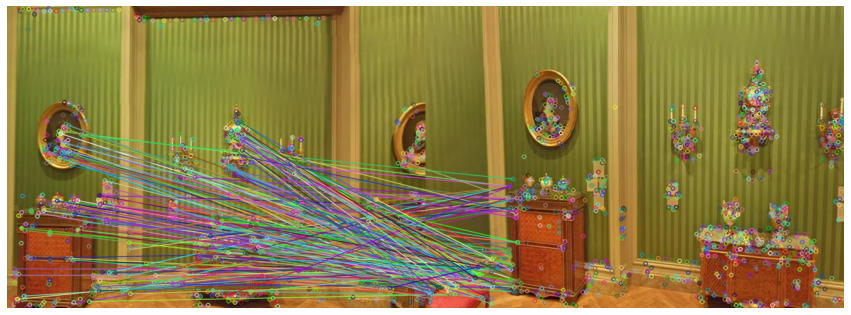

In [118]:
# Load best match image and features
best_match_img = cv.cvtColor(cv.imread('./Dataset/train/' + best_match['name'] + '.jpg'), cv.COLOR_RGB2BGR)
kp_match = best_match['keypoints']
des_match = best_match['descriptors']
good_matches = best_match['good_matches']
matchesMask = best_match['matchesMask']

draw_params = dict(matchesMask = matchesMask, flags = cv.DrawMatchesFlags_DEFAULT)
matches_img = cv.drawMatchesKnn(img, kp_test, best_match_img, kp_match, matches, None, **draw_params)

# Plot
plt.subplots(figsize = (15, 15))
plt.imshow(matches_img)
plt.axis('off')
plt.show()

In [120]:
#matches = matches

# Check each pair of matches
for m, n in matches:
    
    # Check if it's a good enough match
    if m.distance < 1*n.distance:
        
        # Check if match is already present in good_matches
        if m.trainIdx in [match.trainIdx for match in good_matches]:
            
            # Get location of that match in list
            index = [match.trainIdx for match in good_matches].index(m.trainIdx)
            
            # Check which match is better
            if m.distance < good_matches[index].distance:
                good_matches[index] = m
                print('better match found')
            
        else:
            good_matches.append(m)
            

[[<DMatch 0x1233ba230>, <DMatch 0x1728d8e30>],
 [<DMatch 0x3102d8b50>, <DMatch 0x344b00630>],
 [<DMatch 0x302dfb350>, <DMatch 0x35d5879f0>],
 [<DMatch 0x31c1861d0>, <DMatch 0x243324430>],
 [<DMatch 0x2c4f64df0>, <DMatch 0x13ee1c9b0>],
 [<DMatch 0x2ae0494b0>, <DMatch 0x219637950>],
 [<DMatch 0x31a715810>, <DMatch 0x312cd5770>],
 [<DMatch 0x332b76950>, <DMatch 0x2d9b7b730>],
 [<DMatch 0x31373afb0>, <DMatch 0x36948f1d0>],
 [<DMatch 0x30246e970>, <DMatch 0x359db4410>],
 [<DMatch 0x1ecb99510>, <DMatch 0x134941030>],
 [<DMatch 0x160ca1d90>, <DMatch 0x22a030f50>],
 [<DMatch 0x35a9a1f90>, <DMatch 0x1b9af6b10>],
 [<DMatch 0x1907b8e50>, <DMatch 0x20617a4b0>],
 [<DMatch 0x2423641d0>, <DMatch 0x1f3d9e0d0>],
 [<DMatch 0x33d16def0>, <DMatch 0x278fb0f30>],
 [<DMatch 0x3016ffcd0>, <DMatch 0x353dffcf0>],
 [<DMatch 0x2cb6fc570>, <DMatch 0x314803a90>],
 [<DMatch 0x2bdaae8d0>, <DMatch 0x346348af0>],
 [<DMatch 0x3310ce2b0>, <DMatch 0x3628c6830>],
 [<DMatch 0x3874cd6b0>, <DMatch 0x2cffe6df0>],
 [<DMatch 0x3

In [67]:
# Store all good matches as per Lowe's Ratio test.
    good = []
    for m,n in matches:
        
        if m.distance < l_ratio*n.distance:
            good.append(m)
            
            for g in good[:-1]:
                if m.trainIdx == g.trainIdx:
                    if m.distance < g.distance:
                        good.remove(g)
                    else:
                        good.remove(m)
                    break
            
            matchesMask.append([1,0]) # Match
        else:
            matchesMask.append([0,0]) # Mismatch

83